In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
print("Shape of the dataset:", titanic_data.shape)
print("\nColumns in the dataset:\n", titanic_data.columns)

Shape of the dataset: (891, 15)

Columns in the dataset:
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


**Missing Value Analysis**

In [3]:
# Check missing values
print("\nMissing values in each column:\n", titanic_data.isnull().sum())

print("\nPercentage of missing values in each column:\n", (titanic_data.isnull().sum()/len(titanic_data))*100)


Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Percentage of missing values in each column:
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


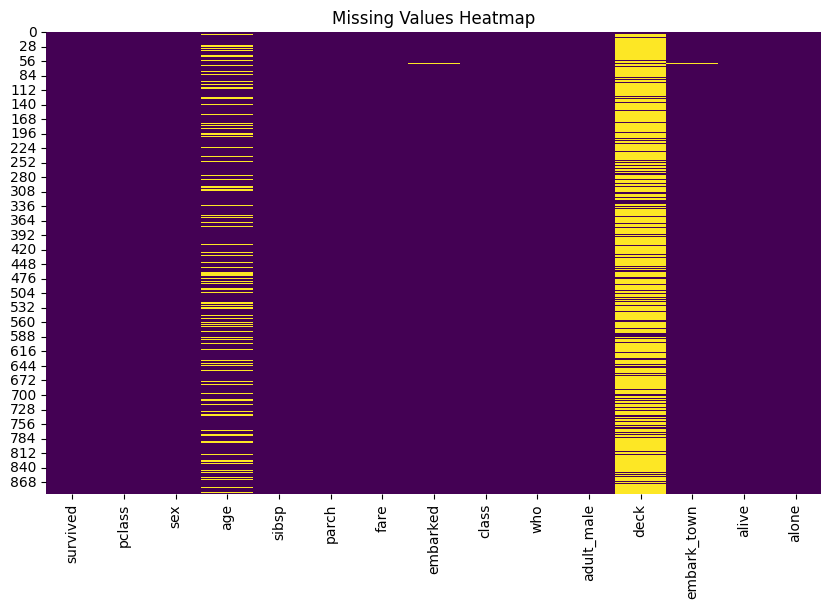

In [4]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

**Missing Value Imputation**

In [5]:
# fill missing value

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

titanic_data_filled = titanic_data.copy() # copy of original

# Separate numerical and categorical columns
numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns
categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns

# Use IterativeImputer for numerical features
imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
titanic_data_filled[numerical_cols] = imputer_num.fit_transform(titanic_data_filled[numerical_cols])

# Fill categorical features with the mode
for col in categorical_cols:
    titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])

# Verify if there are any missing values left
print("\nMissing values after imputation:\n", titanic_data_filled.isnull().sum())


Missing values after imputation:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


**Univariate Analysis**

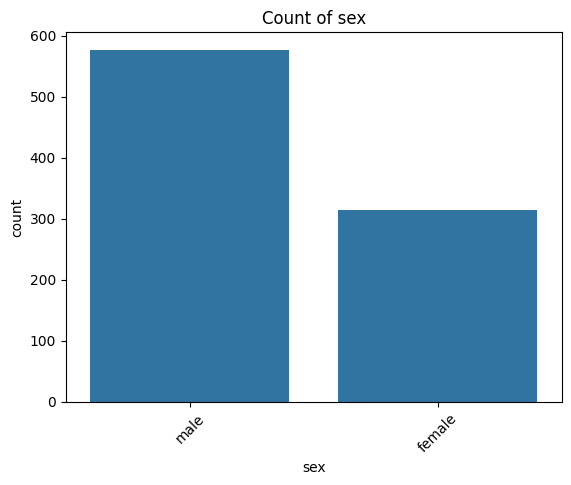

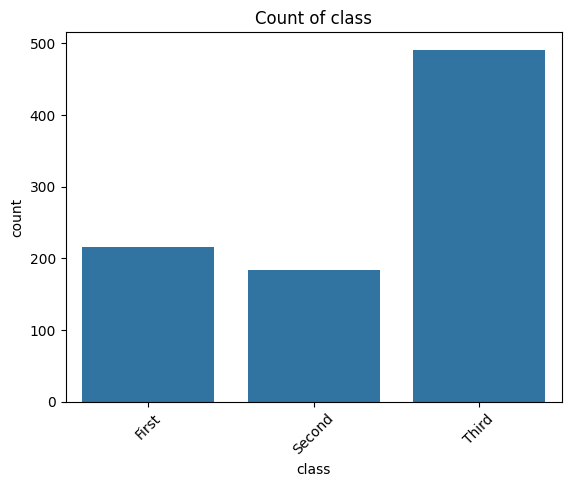

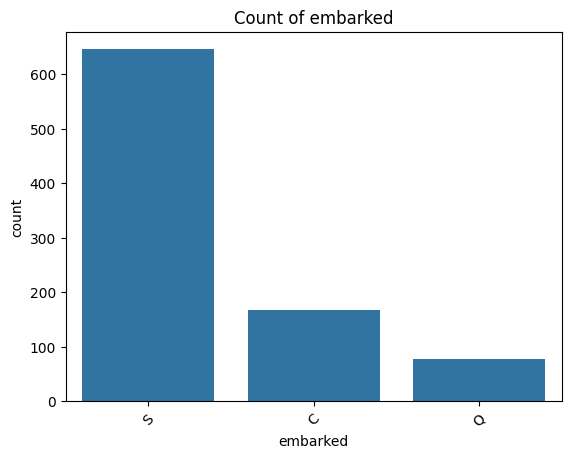

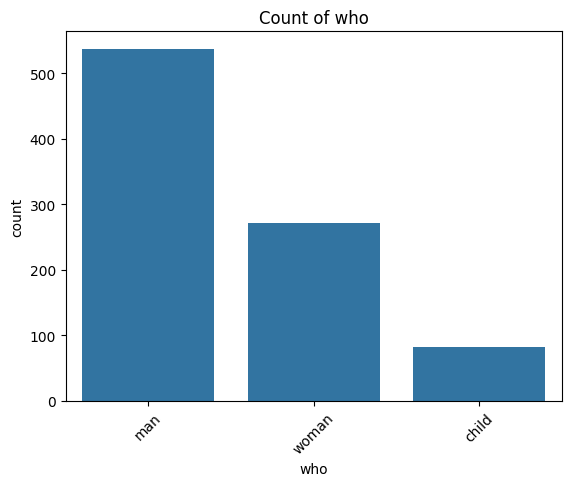

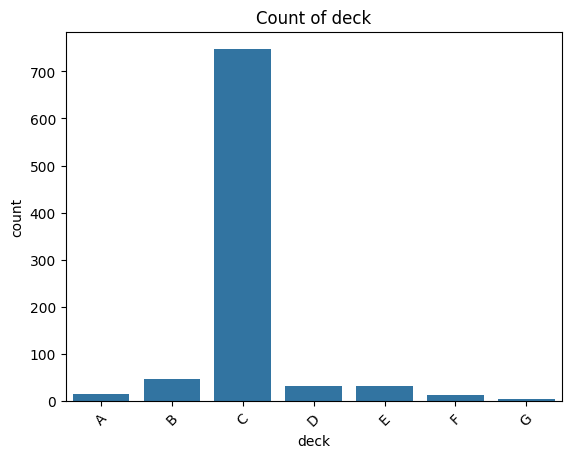

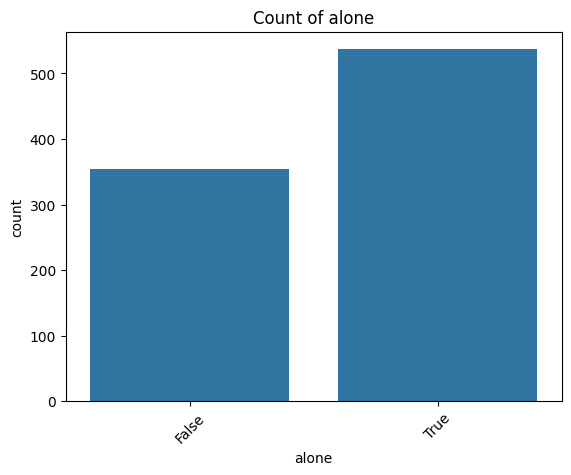

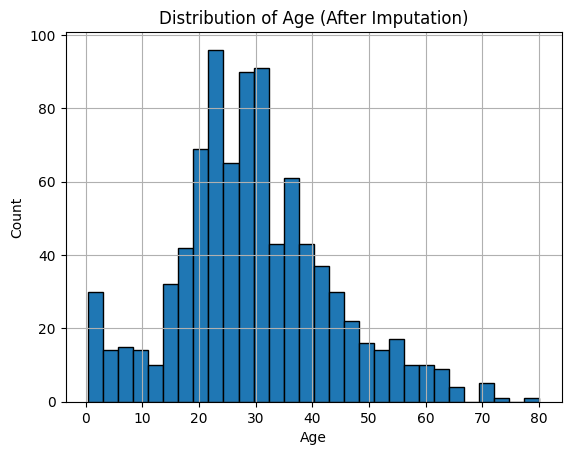

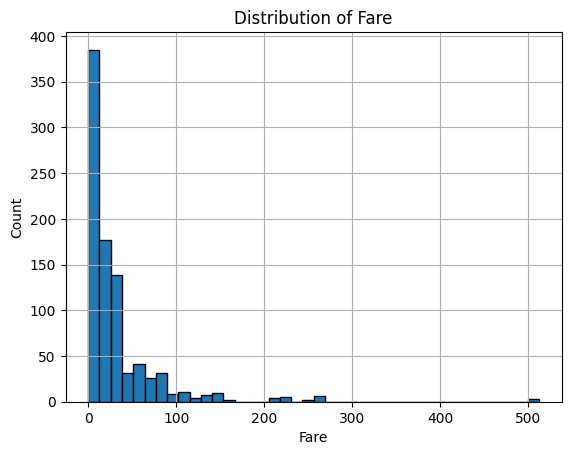

In [6]:
# Categorical Variables
for col in ['sex', 'class', 'embarked', 'who', 'deck', 'alone']:
    sns.countplot(data=titanic_data_filled, x=col)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()
# Numerical Variables
titanic_data_filled['age'].hist(bins=30, edgecolor='black')
plt.title("Distribution of Age (After Imputation)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

titanic_data_filled['fare'].hist(bins=40, edgecolor='black')
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


**Outlier Detection (Boxplots)**

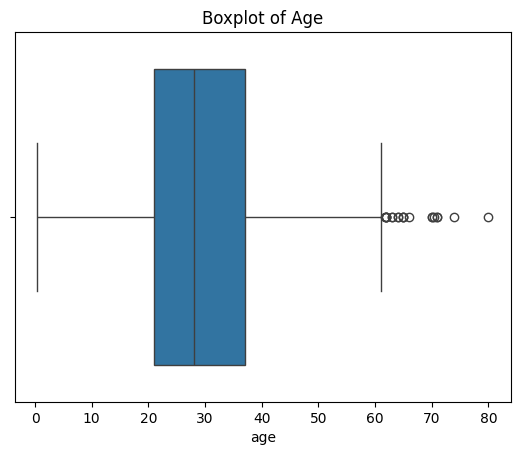

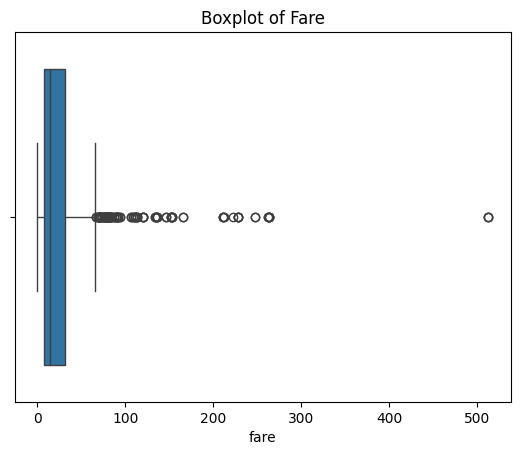

In [7]:
sns.boxplot(x=titanic_data_filled['age'])
plt.title("Boxplot of Age")
plt.show()

sns.boxplot(x=titanic_data_filled['fare'])
plt.title("Boxplot of Fare")
plt.show()

**Bivariate Analysis**

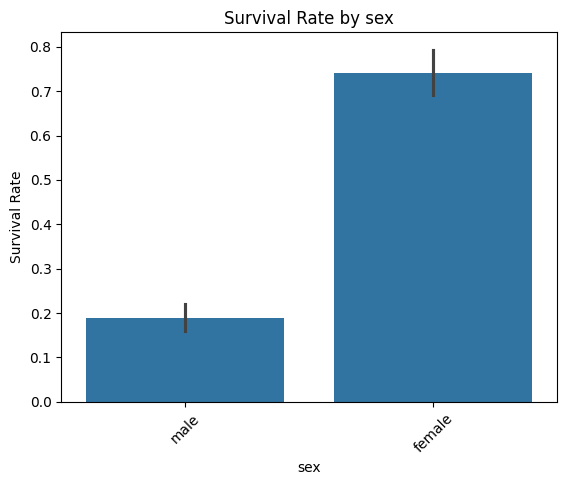

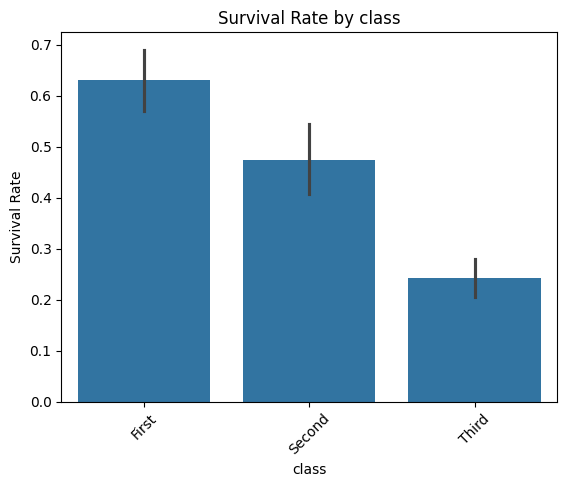

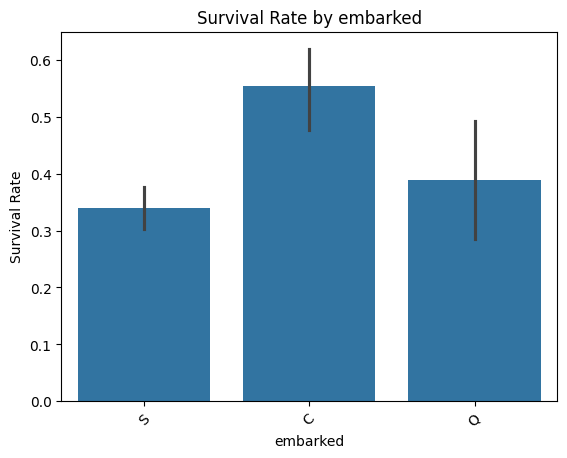

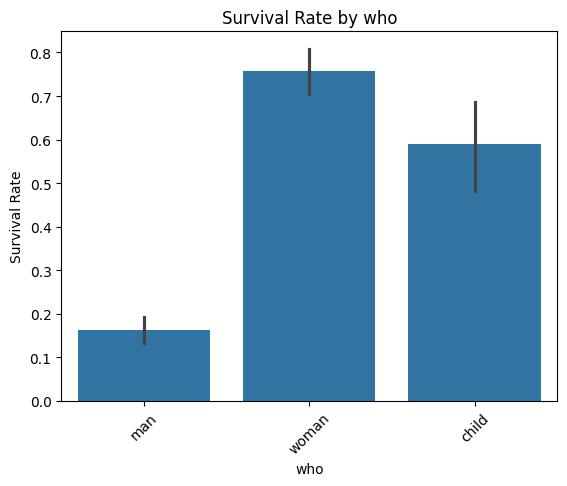

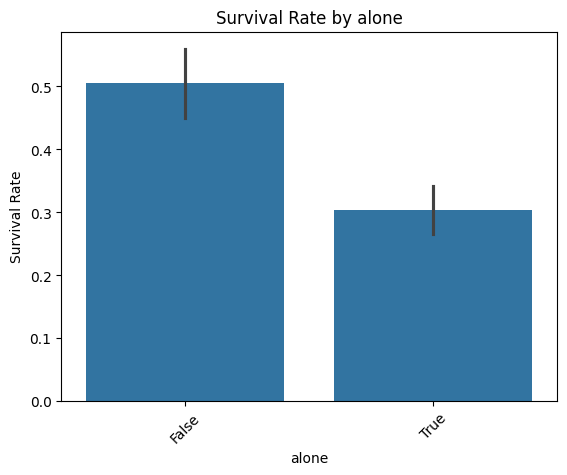

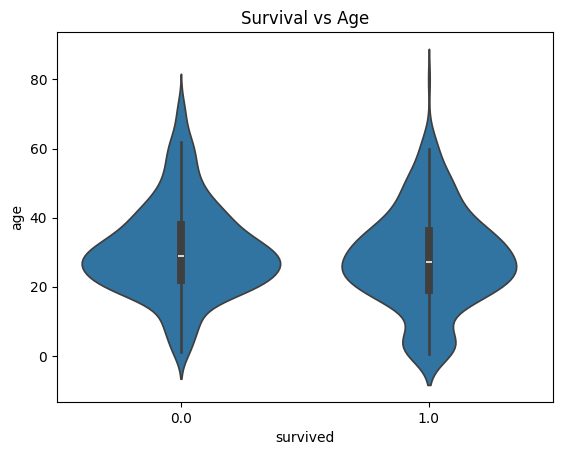

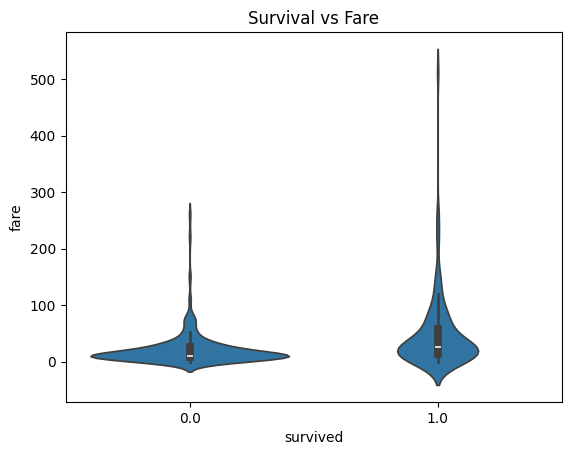

In [8]:
# Categorical vs Survival
for col in ['sex', 'class', 'embarked', 'who', 'alone']:
    sns.barplot(x=col, y='survived', data=titanic_data_filled)
    plt.title(f"Survival Rate by {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Survival Rate")
    plt.show()

# Numerical vs Survival (Violin Plots)
sns.violinplot(x='survived', y='age', data=titanic_data_filled)
plt.title("Survival vs Age")
plt.show()

sns.violinplot(x='survived', y='fare', data=titanic_data_filled)
plt.title("Survival vs Fare")
plt.show()


**Correlation Heatmap**

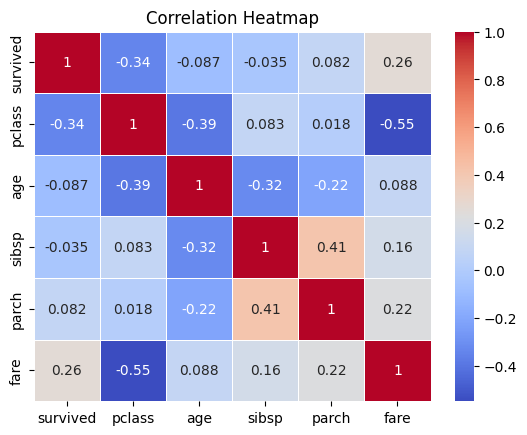

In [9]:
numeric_features = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
corr = titanic_data_filled[numeric_features].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()